In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

from subprocess import run

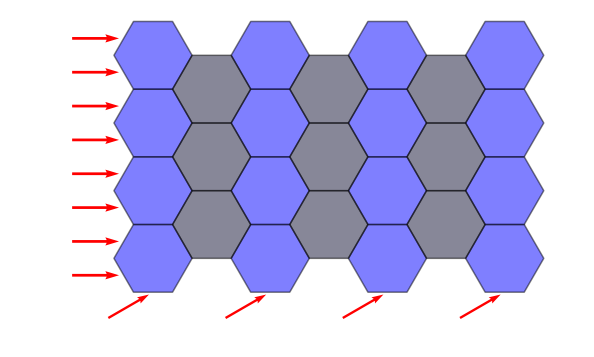

In [2]:
fig, ax = plt.subplots(figsize=(10, 6))
N = 3
M = 3
def draw_hex_grid(ax, N, M, color):
    hex_points = np.array([[np.cos(np.pi * i / 3), np.sin(np.pi * i / 3)] for i in range(6)])
    centers = np.array([[[3 * (i - 0.5 * (N - 1)), np.sqrt(3) * (j - 0.5 * (M - 1))] 
                          for j in range(M)] for i in range(N)])
    polygons = []
    for i in range(N):
        for j in range(M):
            hex_polygon = hex_points + centers[i][j]
            polygons.append(Polygon(xy=hex_polygon, fill=True))
    ax.add_collection(PatchCollection(polygons, facecolor=color, alpha=0.5, edgecolor='k',
                                     linewidth=1.5))

    
# draw directions of incident neutrons
def draw_hex_incident(ax, N, M, alpha, length):
    points = np.array([[-1.5 * N - 0.75, - 0.5 * np.sqrt(3) * M + (0.5 * i - 0.25) * np.sqrt(3)]
                       for i in range(2 * (M + 1))])
    dirs = length * np.tile(np.array([1.0, 0.0]), (2 * (M + 1), 1))
    points -= (alpha + 1) * dirs
    ax.quiver(points[:, 0], points[:, 1], dirs[:, 0], dirs[:, 1], units='x', color='red', width=0.07, scale=1.0)
    
    points = np.array([[-1.5 * N + 3 * i, -0.5 * np.sqrt(3) * (M + 1)] for i in range(N + 1)])
    dirs = length * np.tile(np.array([np.sqrt(3) / 2, 0.5]), (N + 1, 1))
    points -= (alpha + 1) * dirs
    ax.quiver(points[:, 0], points[:, 1], dirs[:, 0], dirs[:, 1], units='x', color='red', width=0.06, scale=1.0)

    
draw_hex_grid(ax, N + 1, M + 1, '#0000ff')
draw_hex_grid(ax, N, M, '#101033')
draw_hex_incident(ax, N, M, 0.1, 1.2)

ax.set_xlim([-7, 7])
ax.set_ylim([-3, 3])
ax.axis('off')
plt.axis('equal')
plt.savefig("hex_grids.png", dpi=300)
plt.show()

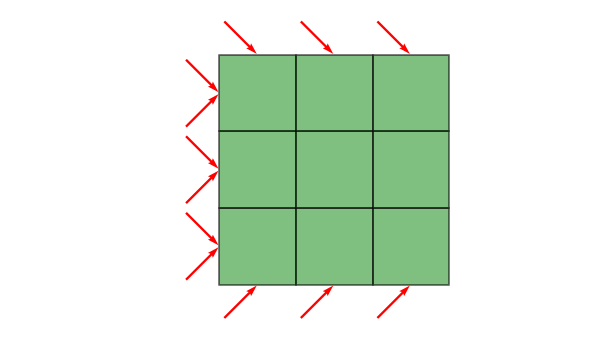

In [3]:
fig, ax = plt.subplots(figsize=(10, 6))
N = 3
M = 3
def draw_rect_grid(N, M, color):
    rect_points = np.array([[0.5, 0.5], [-0.5, 0.5], [-0.5, -0.5], [0.5, -0.5]])
    centers = np.array([[[i - 0.5 * (N - 1), j - 0.5 * (M - 1)] 
                         for j in range(M)] for i in range(N)])
    polygons = []
    for i in range(N):
        for j in range(M):
            rect_polygon = rect_points + centers[i][j]
            polygons.append(Polygon(xy=rect_polygon, fill=True))
    ax.add_collection(PatchCollection(polygons, facecolor=color, alpha=0.5, edgecolor='k',
                                      linewidth=2))


# draw directions of incident neutrons
def draw_rect_incident(ax, N, M, alpha, length):
    points = np.array([[-0.5 * N, i - 0.5 * (M - 1)] for i in range(M)])
    points = np.tile(points, (2, 1))
    dirs = [np.tile(np.array([0.5 * np.sqrt(2), 0.5 * np.sqrt(2)]), (M, 1)),
            np.tile(np.array([0.5 * np.sqrt(2), -0.5 * np.sqrt(2)]), (M, 1))]
    dirs = length * np.concatenate(dirs)
    points -= (alpha + 1) * dirs
    ax.quiver(points[:, 0], points[:, 1], dirs[:, 0], dirs[:, 1], units='x', color='red', width=0.03, scale=1.0)
    
    points = np.array([[i - 0.5 * (N - 1), -0.5 * M] for i in range(N)])
    dirs = length * np.tile(np.array([0.5 * np.sqrt(2), 0.5 * np.sqrt(2)]), (N, 1))
    points -= (alpha + 1) * dirs
    ax.quiver(points[:, 0], points[:, 1], dirs[:, 0], dirs[:, 1], units='x', color='red', width=0.03, scale=1.0)
    
    points = np.array([[i - 0.5 * (N - 1), 0.5 * M] for i in range(N)])
    dirs = length * np.tile(np.array([0.5 * np.sqrt(2), -0.5 * np.sqrt(2)]), (N, 1))
    points -= (alpha + 1) * dirs
    ax.quiver(points[:, 0], points[:, 1], dirs[:, 0], dirs[:, 1], units='x', color='red', width=0.03, scale=1.0)
   


draw_rect_grid(N, M, 'green')
draw_rect_incident(ax, N, M, 0.03, 0.6)
                      
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.axis('off')
plt.axis('equal')
plt.savefig("rect_grids.png", dpi=300)
plt.show()

In [4]:
from visual import Solution

Задаем поток, падающий на образец в случае шаблона из прямоугольных параллелепипедов.

In [5]:
N = 3
M = 3
number_of_layers_rect = 1
input_stream = np.array([[0, 0, 0], [0, 0, 3], [0, 0, 17],
                         [0, 1, 3], [0, 1, 17],
                         [0, 2, 3], [0, 2, 17], [0, 2, 16],
                         [1, 0, 0], [2, 0, 0],
                         [1, 2, 16], [2, 2, 16]])
output_file = open("input_stream_rect.txt", "w")
output_file.write(str(number_of_layers_rect * len(input_stream)) + '\n')
for i in range(number_of_layers_rect):
    for stream in input_stream:
        x, y, direction = stream
        output_file.write(f"0 {x} {y} {i} {direction} 1.0\n")
output_file.close()

В обоих тестах интенсивность внешних пучков принимается равной $\varphi^{ent} = 1.0$.

В первом тесте мы полагаем, что функция источника нейтронов $q^{ext}$ равна 0, поэтому точное решение имеет вид:
$$\varphi_{exact}(l) = \varphi^{ent}e^{-\Sigma l}.$$
Во втором тесте подразумевается постоянный по совокупности ячеек источник $q^{ext}=1.0$, аналитическое решение тогда выглядит следующим образом:
$$\varphi_{exact}(l) = \frac{q^{ext}}{\Sigma} + \left(\varphi^{ent} - \frac{q^{ext}}{\Sigma}\right)e^{-\Sigma l}.$$

В функциях rect_exact_solution и hex_exact_solution параметр test_num задает номер теста: первый или второй.

In [6]:
def rect_exact_solution(test_num, sigma=0.5):
    assert test_num in [1, 2], "Possible values for test_num are 1 or 2."
    
    values = dict()
    values[0] = np.array([[0.0, 0.5, 0.5], [0.0, 1.0, 1.5], [0.0, 1.0, 2.0]])
    values[3] = np.array([[0.0, 0.0, 0.0], [1.0, 1.0, 0.5], [2.0, 1.5, 0.5]])
    values[16] = np.array([[0.5, 0.5, 0.0], [1.5, 1.0, 0.0], [2.0, 1.0, 0.0]])
    values[17] = np.array([[0.0, 0.0, 0.0], [0.5, 1.0, 1.0], [0.5, 1.5, 2.0]])

    for key in values.keys():
        if test_num == 1:
            values[key] = np.exp(-np.sqrt(2) * values[key] * sigma)
        else:
            values[key] = 1 / sigma + (1 - 1 / sigma) * np.exp(-np.sqrt(2) * values[key] * sigma)

    exact_solution = np.zeros((3, 3, number_of_layers_rect, 30))
    for direction in values.keys():
        for i in range(3):
            for j in range(3):
                for k in range(number_of_layers_rect):
                    exact_solution[i, j, k, direction] = values[direction][i, j]
                    
    return exact_solution

In [7]:
sigma = 0.5
test_num = 1
run(f"./example --grid 3 3 1 --sigma {sigma} --ref 0 --test {test_num}", check=True, shell=True, cwd="..")

sol = Solution()
sol.load("result.out")
if np.allclose(sol.grids[0], rect_exact_solution(test_num, sigma)):
    print("Solutions are the same")
else:
    print("There are some mismatches in answers")

Solutions are the same


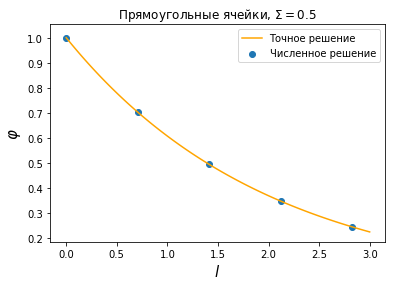

In [8]:
def plot_rect_cut(test_num, sigma=0.5):
    assert test_num in [1, 2], "Possible values for test_num are 1 or 2."
    
    inds = [[0, 0, 0, 0], [1, 0, 0, 17], [1, 1, 0, 0], [2, 1, 0, 17], [2, 2, 0, 0]]
    cut = np.array([sol.grids[0][i, j, k, l] for i, j, k, l in inds])

    x = np.linspace(0, 3, 100)
    
    if test_num == 1:
        y = np.exp(-sigma * x)
    else:
        y = 1 / sigma + (1 - 1 / sigma) * np.exp(-sigma * x)
        
    plt.scatter(np.array(range(5)) * np.sqrt(2) / 2, cut, marker='o', label='Численное решение')
    plt.plot(x, y, color='orange', label='Точное решение')
    plt.legend()
    plt.xlabel(r'$l$', fontsize=15)
    plt.ylabel(r'$\varphi$', fontsize=15)
    plt.title(r"Прямоугольные ячейки, $\Sigma=0.5$")
    plt.savefig(f"rect_test{test_num}.png", dpi=300)
    plt.show()
    
plot_rect_cut(test_num)

Зададим внешний поток на границах образца в гексогональном случае. Результат сохраним в файле input_stream_hex.txt.

In [9]:
number_of_layers_hex = 1
input_stream = np.array([[0, 0, 4], [0, 0, 29], [0, 0, 52],
                         [0, 1, 29], [0, 1, 52], 
                         [0, 2, 29], [0, 2, 52], 
                         [0, 3, 29], [0, 3, 52], 
                         [1, 0, 4], [1, 0, 52], 
                         [2, 0, 4], [2, 0, 52],
                         [3, 0, 4], [3, 0, 52], 
                         [0, 0, 10], [0, 0, 34],
                         [0, 1, 10], [0, 1, 34],
                         [0, 2, 10], [0, 2, 34],
                         [0, 3, 10], [0, 3, 34]])
output_file = open("input_stream_hex.txt", "w")
output_file.write(str(number_of_layers_hex * len(input_stream)) + '\n')
for i in range(number_of_layers_hex):
    for stream in input_stream:
        x, y, direction = stream
        output_file.write(f"0 {x} {y} {i} {direction} 1.0\n")
output_file.close()

Получим векторное поле для точного решения задачи в гексогональном случае. Для этого нужно вручную заполнить 16 значений для 0-решетки и 9 для 1-решетки. Всего для каждой ячейки затрагивается 5 направлений при данном входном потоке.

In [10]:
def hex_exact_solution(test_num, sigma=0.2):
    assert test_num in [1, 2], "Possible values for test_num are 1 or 2."
    
    exact_solution = []
    # 0 - grid
    values = dict()
    values[4] = np.array([[0.0, 0.5, 0.5, 0.5],
                          [0.0, 1.5, 2.5, 2.5],
                          [0.0, 1.5, 3.5, 4.5],
                          [0.0, 1.5, 3.5, 5.5]]) * np.sqrt(3)
    values[29] = np.array([[0.0, 0.0, 0.0, 0.0],
                           [1.0, 2.0, 2.0, 1.5],
                           [1.0, 3.0, 4.0, 3.5],
                           [1.0, 3.0, 5.0, 5.5]]) * np.sqrt(3)
    values[52] = np.array([[0.0, 0.0, 0.0, 0.0],
                           [0.0, 2.0, 2.0, 2.0],
                           [0.0, 2.0, 4.0, 4.0],
                           [0.0, 2.0, 4.0, 6.0]]) * np.sqrt(3)
    values[10] = np.array([[0.0, 0.0, 0.0, 0.0],
                           [1.5, 3.0, 3.0, 3.0],
                           [3.0, 6.0, 6.0, 6.0],
                           [4.5, 9.0, 9.0, 9.0]])
    values[34] = np.array([[0.0, 0.0, 0.0, 0.0],
                           [3.0, 3.0, 3.0, 1.5],
                           [6.0, 6.0, 6.0, 3.0],
                           [9.0, 9.0, 9.0, 4.5]])

    for key in values.keys():
        if test_num == 1:
            values[key] = np.exp(-values[key] * sigma)
        else:
            values[key] = 1 / sigma + (1 - 1 / sigma) * np.exp(-values[key] * sigma)
    
    exact_solution.append(np.zeros((4, 4, number_of_layers_hex, 56)))
    for direction in range(56):
        if direction in values:
            for i in range(4):
                for j in range(4):
                    for k in range(number_of_layers_hex):
                        exact_solution[0][i, j, k, direction] = values[direction][i, j]

    # 1 - grid
    values[4] = np.array([[0.5, 1.5, 1.5],
                          [0.5, 2.5, 3.5],
                          [0.5, 2.5, 4.5]]) * np.sqrt(3)
    values[29] = np.array([[1.0, 1.0, 1.0],
                           [2.0, 3.0, 3.0],
                           [2.0, 4.0, 5.0]]) * np.sqrt(3)
    values[52] = np.array([[1.0, 1.0, 1.0],
                           [1.0, 3.0, 3.0],
                           [1.0, 3.0, 5.0]]) * np.sqrt(3)
    values[10] = np.array([[1.5, 1.5, 1.5],
                           [4.5, 4.5, 4.5],
                           [7.5, 7.5, 7.5]])
    values[34] = values[10]

    for key in values.keys():
        if test_num == 1:
            values[key] = np.exp(-values[key] * sigma)
        else:
            values[key] = 1 / sigma + (1 - 1 / sigma) * np.exp(-values[key] * sigma)
            
    exact_solution.append(np.zeros((3, 3, number_of_layers_hex, 56)))
    for direction in values:
        for i in range(3):
            for j in range(3):
                for k in range(number_of_layers_hex):
                    exact_solution[1][i, j, k, direction] = values[direction][i, j]
                    
    return exact_solution

Загрузим полученное решение на проверку.

In [11]:
sigma = 0.2
test_num = 1
run(f"./example --hex --grid 3 3 1 --sigma {sigma} --ref 0 --test {test_num}", check=True, shell=True, cwd="..")

sol = Solution()
sol.load("result.out")
exact_solution = hex_exact_solution(test_num, sigma)

if np.allclose(sol.grids[0], exact_solution[0]):
    print("0-grid - ok")
else:
    print("There is some problem with 0-grid")
    
if np.allclose(sol.grids[1], exact_solution[1]):
    print("1-grid - ok")
else:
    print("There is some problem with 1-grid")

0-grid - ok
1-grid - ok


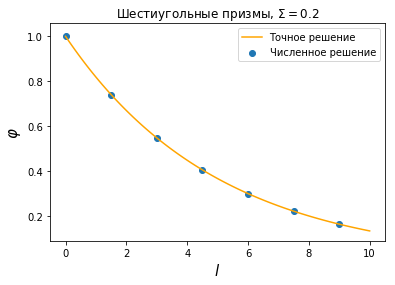

In [12]:
def plot_hex_cut(test_num, sigma=0.2):
    assert test_num in [1, 2], "Possible values for test_num are 1 or 2."

    inds = [[0, 0, 0, 0, 34], [1, 0, 0, 0, 10],
            [0, 1, 0, 0, 34], [1, 1, 0, 0, 10],
            [0, 2, 0, 0, 34], [1, 2, 0, 0, 10],
            [0, 3, 0, 0, 34]]

    cut = [sol.grids[direction][grid, i, j, k] for direction, grid, i, j, k in inds]

    x = np.linspace(0, 10, 100)
    if test_num == 1:
        y = np.exp(-sigma * x)
    else:
        y = 1 / sigma + (1 - 1 / sigma) * np.exp(-sigma * x)
        
    plt.scatter(np.array(range(7)) * 1.5, cut, marker='o', label='Численное решение')
    plt.plot(x, y, color='orange', label='Точное решение')
    plt.legend()
    plt.xlabel(r'$l$', fontsize=15)
    plt.ylabel(r'$\varphi$', fontsize=15)
    plt.title(r"Шестиугольные призмы, $\Sigma=0.2$")
    plt.savefig(f"hex_test{test_num}.png", dpi=300)
    plt.show()
    
plot_hex_cut(test_num, sigma)